<a href="https://colab.research.google.com/github/IsmaelMekene/meteor-object-detector/blob/main/MODEL_update.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras

In [2]:
import tensorflow as tf 

In [3]:
tf.__version__


'2.4.0'

In [ ]:
#load a ResNet101V2 model
meteor2_resnet101v2 = tf.keras.applications.ResNet101V2(
    include_top=True, weights='imagenet', input_tensor=None,
    input_shape=None, pooling=None, classes=1000,
    classifier_activation='softmax'
)

179519488/179518384 [==============================] - 2s 0us/step


In [ ]:
#View the summary
meteor2_resnet101v2.summary()

Model: "resnet101v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
________________________________________________________________________________________

In [ ]:
#access a given layer of the model
layer_conv2_block2_out = meteor2_resnet101v2.get_layer('conv2_block2_out')


In [ ]:
#visualise the input
meteor2_resnet101v2.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_2')>

In [ ]:
#visualise the output
meteor2_resnet101v2.output

<KerasTensor: shape=(None, 1000) dtype=float32 (created by layer 'predictions')>

In [ ]:
#visualise the input and output of layer 'conv1_conv'

In [ ]:
meteor2_resnet101v2.get_layer('conv1_conv').input

<KerasTensor: shape=(None, 230, 230, 3) dtype=float32 (created by layer 'conv1_pad')>

In [ ]:
meteor2_resnet101v2.get_layer('conv1_conv').output

<KerasTensor: shape=(None, 112, 112, 64) dtype=float32 (created by layer 'conv1_conv')>

In [ ]:
#visualise the input and output of layer 'conv2_block3_1_relu'

In [ ]:
meteor2_resnet101v2.get_layer('conv2_block3_1_relu').input

<KerasTensor: shape=(None, 56, 56, 64) dtype=float32 (created by layer 'conv2_block3_1_bn')>

In [ ]:
meteor2_resnet101v2.get_layer('conv2_block3_1_relu').output

<KerasTensor: shape=(None, 56, 56, 64) dtype=float32 (created by layer 'conv2_block3_1_relu')>

In [ ]:
#visualise the input and output of layer 'conv3_block4_1_relu '

In [ ]:
meteor2_resnet101v2.get_layer('conv3_block4_1_relu').input

<KerasTensor: shape=(None, 28, 28, 128) dtype=float32 (created by layer 'conv3_block4_1_bn')>

In [ ]:
meteor2_resnet101v2.get_layer('conv3_block4_1_relu').output

<KerasTensor: shape=(None, 28, 28, 128) dtype=float32 (created by layer 'conv3_block4_1_relu')>

In [ ]:
#visualise the input and output of layer 'conv4_block23_1_relu ' conv4_block23_1_relu 

In [ ]:
meteor2_resnet101v2.get_layer('conv4_block23_1_relu').input

<KerasTensor: shape=(None, 14, 14, 256) dtype=float32 (created by layer 'conv4_block23_1_bn')>

In [ ]:
meteor2_resnet101v2.get_layer('conv4_block23_1_relu').output

<KerasTensor: shape=(None, 14, 14, 256) dtype=float32 (created by layer 'conv4_block23_1_relu')>

In [ ]:
#visualise the input and output of layer 'conv5_block3_2_relu'conv5_block3_2_relu 

In [ ]:
meteor2_resnet101v2.get_layer('conv5_block3_2_relu').input

<KerasTensor: shape=(None, 7, 7, 512) dtype=float32 (created by layer 'conv5_block3_2_bn')>

In [ ]:
meteor2_resnet101v2.get_layer('conv5_block3_2_relu').output

<KerasTensor: shape=(None, 7, 7, 512) dtype=float32 (created by layer 'conv5_block3_2_relu')>

<KerasTensor: shape=(None, 7, 7, 512) dtype=float32 (created by layer 'conv5_block3_2_relu')>

In [ ]:
# rearrange the model by selecting the needed layers.
meteor_model = tf.keras.Model(inputs=meteor2_resnet101v2.input, outputs=[meteor2_resnet101v2.get_layer('conv1_conv').output, 
                                                                  meteor2_resnet101v2.get_layer('conv2_block3_1_relu').output,
                                                                  meteor2_resnet101v2.get_layer('conv3_block4_1_relu').output,
                                                                  meteor2_resnet101v2.get_layer('conv4_block23_1_relu').output,
                                                                  meteor2_resnet101v2.get_layer('conv5_block3_2_relu').output])


In [ ]:
meteor_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
f1 = meteor2_resnet101v2.get_layer('conv5_block3_2_relu').output  #f1 according to EAST paper
f2 = meteor2_resnet101v2.get_layer('conv4_block23_1_relu').output  #f2 according to EAST paper
f3 = meteor2_resnet101v2.get_layer('conv3_block4_1_relu').output  #f3 according to EAST paper
f4 = meteor2_resnet101v2.get_layer('conv2_block3_1_relu').output  #f4 according to EAST paper
f5 = meteor2_resnet101v2.get_layer('conv1_conv').output  #f5 according to EAST paper

In [ ]:
from keras.layers import *

### First green block (h1 - h2)

In [ ]:
unpool_h1 = UpSampling2D(size=(2, 2), interpolation="nearest")(f1) #unpool the layer in order to make concatenation possible
concat_h1_f2 = Concatenate()([unpool_h1, f2])  #concatenate with the f2 layer
conv1vs1_in_h1 = tf.keras.layers.Conv2D(filters = 128, kernel_size = 1, padding="same")(concat_h1_f2)  #make a (1×1) 2D convolution
conv3vs3_in_h1 = tf.keras.layers.Conv2D(filters = 128, kernel_size = 3, padding="same")(conv1vs1_in_h1) #make a (3×3) 2D convolution

### Second green block (h2 - h3)

In [ ]:
unpool_h2 = UpSampling2D(size=(2, 2), interpolation="nearest")(conv3vs3_in_h1) #unpool the layer in order to make concatenation possible
concat_h2_f3 = Concatenate()([unpool_h2, f3])  #concatenate with the f3 layer
conv1vs1_in_h2 = tf.keras.layers.Conv2D(filters = 64, kernel_size = 1, padding="same")(concat_h2_f3)  #make a (1×1) 2D convolution
conv3vs3_in_h2 = tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding="same")(conv1vs1_in_h2) #make a (3×3) 2D convolution

### third green block (h3 - h4)

In [ ]:
unpool_h3 = UpSampling2D(size=(2, 2), interpolation="nearest")(conv3vs3_in_h2) #unpool the layer in order to make concatenation possible
concat_h3_f4 = Concatenate()([unpool_h3, f4])  #concatenate with the f3 layer
conv1vs1_in_h3 = tf.keras.layers.Conv2D(filters = 32, kernel_size = 1, padding="same")(concat_h3_f4)  #make a (1×1) 2D convolution
conv3vs3_in_h3 = tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding="same")(conv1vs1_in_h3) #make a (3×3) 2D convolution

In [ ]:
tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding="same")(conv1vs1_in_h3)

<KerasTensor: shape=(None, 56, 56, 32) dtype=float32 (created by layer 'conv2d_7')>

### Fourth green block (h4 - h5)

In [ ]:
unpool_h4 = UpSampling2D(size=(2, 2), interpolation="nearest")(conv3vs3_in_h3) #unpool the layer in order to make concatenation possible
concat_h4_f5 = Concatenate()([unpool_h4, f5])  #concatenate with the f3 layer
conv1vs1_in_h4 = tf.keras.layers.Conv2D(filters = 16, kernel_size = 1, padding="same")(concat_h4_f5)  #make a (1×1) 2D convolution
conv3vs3_in_h4 = tf.keras.layers.Conv2D(filters = 16, kernel_size = 3, padding="same")(conv1vs1_in_h4) #make a (3×3) 2D convolution

In [ ]:
tf.keras.layers.Conv2D(filters = 16, kernel_size = 3, padding="same")(conv1vs1_in_h4)

<KerasTensor: shape=(None, 112, 112, 16) dtype=float32 (created by layer 'conv2d_10')>

### Last green block

In [ ]:
conv3vs3_in_h5 = tf.keras.layers.Conv2D(filters = 16, kernel_size = 3, padding="same")(conv3vs3_in_h4)


In [ ]:
tf.keras.layers.Conv2D(filters = 16, kernel_size = 3, padding="same")(conv3vs3_in_h4)

<KerasTensor: shape=(None, 112, 112, 16) dtype=float32 (created by layer 'conv2d_12')>

### First blue block (output layer)


In [ ]:
conv1vs1_in_outputlayer = tf.keras.layers.Conv2D(filters = 1, kernel_size = 1, padding="same", name="outputlayer_SCORE")(conv3vs3_in_h5)

In [ ]:
tf.keras.layers.Conv2D(filters = 1, kernel_size = 1, padding="same")(conv3vs3_in_h5)

<KerasTensor: shape=(None, 112, 112, 1) dtype=float32 (created by layer 'conv2d_13')>

### Second blue block (QUAD geometry)

In [ ]:
conv1vs1_in_QUADgeometry = tf.keras.layers.Conv2D(filters = 4, kernel_size = 1, padding="same", name="QUAD_geometry")(conv3vs3_in_h5)

In [ ]:
tf.keras.layers.Conv2D(filters = 4, kernel_size = 1, padding="same")(conv3vs3_in_h5)

<KerasTensor: shape=(None, 112, 112, 4) dtype=float32 (created by layer 'conv2d_14')>

### model

In [ ]:
#Build our customized model
our_meteor_model = tf.keras.Model(inputs=meteor2_resnet101v2.input, outputs=[conv1vs1_in_outputlayer, conv1vs1_in_QUADgeometry])

In [ ]:
our_meteor_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
____________________________________________________________________________________________

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.877554 to fit



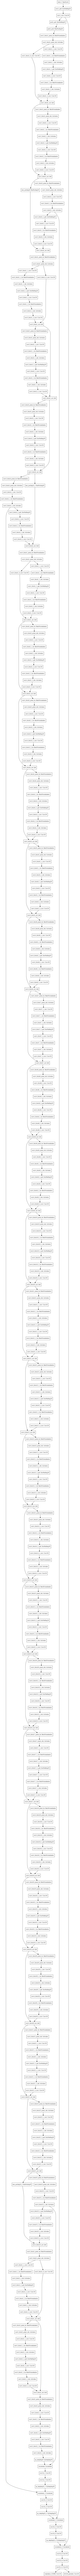

In [ ]:
tf.keras.utils.plot_model(
    our_meteor_model, to_file='model.png', show_shapes=False,
    show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96
)